In [71]:
from __future__      import division
from IPython.display import display
from matplotlib      import pyplot as plt
%matplotlib inline

import numpy  as np
import pandas as pd
import random, sys, os, re
from pandas.tools.plotting import scatter_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_predict, permutation_test_score,cross_val_score

In [39]:
#set path for reading data
path = 'C:/Users/mom1/Desktop/blooddonations'

In [40]:
#read the data
blood = pd.read_csv(path + '/traindata.csv') 
blood.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [41]:
#set id as index
blood_indexed=blood.set_index(['Unnamed: 0'])
blood_indexed.index.names = ['ID']
blood_indexed.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
ID,,,,,
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0


In [42]:
print blood_indexed.shape
print blood_indexed.dtypes
print blood_indexed.describe()

(576, 5)
Months since Last Donation     int64
Number of Donations            int64
Total Volume Donated (c.c.)    int64
Months since First Donation    int64
Made Donation in March 2007    int64
dtype: object
       Months since Last Donation  Number of Donations  \
count                  576.000000           576.000000   
mean                     9.439236             5.427083   
std                      8.175454             5.740010   
min                      0.000000             1.000000   
25%                      2.000000             2.000000   
50%                      7.000000             4.000000   
75%                     14.000000             7.000000   
max                     74.000000            50.000000   

       Total Volume Donated (c.c.)  Months since First Donation  \
count                   576.000000                   576.000000   
mean                   1356.770833                    34.050347   
std                    1435.002556                    24.227672   
m

In [43]:
#train and test split
import numpy as np
from sklearn.cross_validation import train_test_split
train, test = train_test_split(blood_indexed)

In [44]:
#test and train basics
print test.shape
print test.dtypes
print test.describe()
print train.shape
print train.dtypes
print train.describe()

(144, 5)
Months since Last Donation     int64
Number of Donations            int64
Total Volume Donated (c.c.)    int64
Months since First Donation    int64
Made Donation in March 2007    int64
dtype: object
       Months since Last Donation  Number of Donations  \
count                  144.000000           144.000000   
mean                     9.944444             5.152778   
std                      8.852938             5.427616   
min                      0.000000             1.000000   
25%                      4.000000             2.000000   
50%                      9.000000             4.000000   
75%                     14.000000             6.000000   
max                     72.000000            38.000000   

       Total Volume Donated (c.c.)  Months since First Donation  \
count                   144.000000                   144.000000   
mean                   1288.194444                    33.597222   
std                    1356.903949                    25.160831   
m

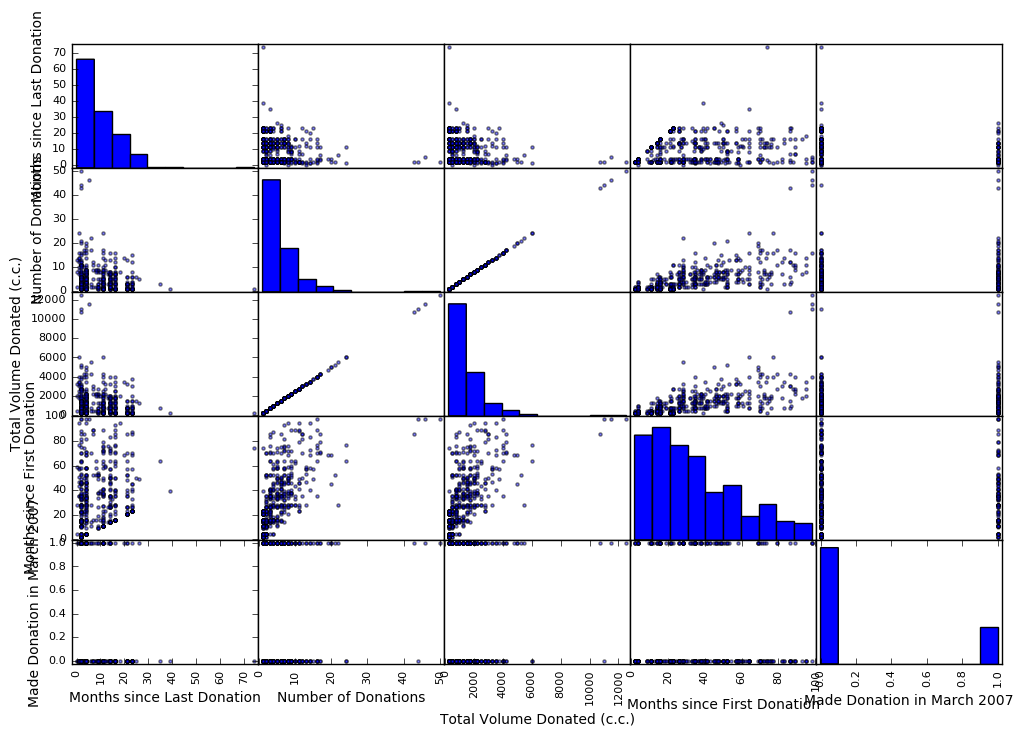

In [45]:
scatter_matrix(train,figsize=(12,8))
plt.show()

In [46]:
train.corr()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
Months since Last Donation,1.000000,-0.196493,-0.196493,0.166046,-0.275224
Number of Donations,-0.196493,1.000000,1.000000,0.620365,0.252379
Total Volume Donated (c.c.),-0.196493,1.000000,1.000000,0.620365,0.252379
Months since First Donation,0.166046,0.620365,0.620365,1.000000,0.003183
Made Donation in March 2007,-0.275224,0.252379,0.252379,0.003183,1.000000


In [47]:
trainset=train.filter(items=['Months since Last Donation','Number of Donations','Total Volume Donated (c.c.)','Months since First Donation'])
trainset.shape

(432, 4)

In [48]:
traintarget=train['Made Donation in March 2007'].astype('category')

In [49]:
testset=test.filter(items=['Months since Last Donation','Number of Donations','Total Volume Donated (c.c.)','Months since First Donation'])
testset.shape

(144, 4)

In [50]:
testtarget=test['Made Donation in March 2007'].astype('category')

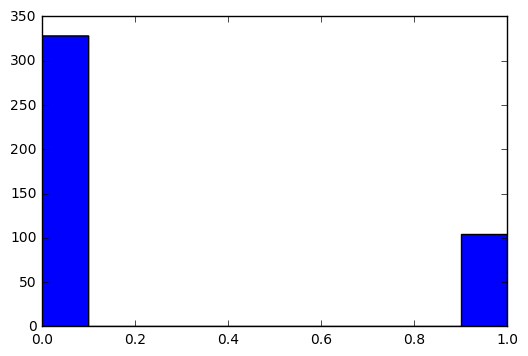

In [51]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(traintarget)
plt.show()

In [83]:
#all in one
KNeighborsClassifier(n_neighbors=10).fit(trainset,traintarget).score(trainset,traintarget)

0.79166666666666663

In [85]:
#intialize classifier
knn=KNeighborsClassifier(n_neighbors=10)

In [86]:
#fit training data
knn_fit=knn.fit(trainset,traintarget)

In [87]:
#get fit score
knn_fit_score=knn_fit.score(trainset,traintarget)
knn_fit_score

0.79166666666666663

In [100]:
cv_score_knn = cross_val_score(knn, trainset, traintarget, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_score_knn.mean(), cv_score_knn.std() * 2))

Accuracy: 0.76 (+/- 0.06)


In [54]:
predicted=knn.predict(testset)

In [55]:
acc=accuracy_score(testtarget,predicted)

In [56]:
acc

0.75694444444444442

In [108]:
StatifiedCV = StratifiedKFold(y            = traintarget, 
                              n_folds      = 10, 
                              shuffle      = True, 
                              random_state = 97)

In [65]:
StatifiedCV

sklearn.cross_validation.StratifiedKFold(labels=[0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0], n_folds=10, shuffle=True, random_state=97)

In [60]:
%%time

train_preds = cross_val_predict(estimator    = knn, 
                                X            = trainset, 
                                y            = traintarget, 
                                cv           = StatifiedCV, 
                                n_jobs       = -1, 
                                verbose      = 0, 
                                fit_params   = None, 
                                pre_dispatch = '2*n_jobs')

y_true, y_pred   = traintarget, train_preds

Wall time: 2min 44s


In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred, labels=None)
print cm

accuracy = round(np.trace(cm)/float(np.sum(cm)),4)
misclass = 1 - accuracy
print("Accuracy {}, mis-class rate {}".format(accuracy,misclass))

[[313  15]
 [ 90  14]]
Accuracy 0.7569, mis-class rate 0.2431


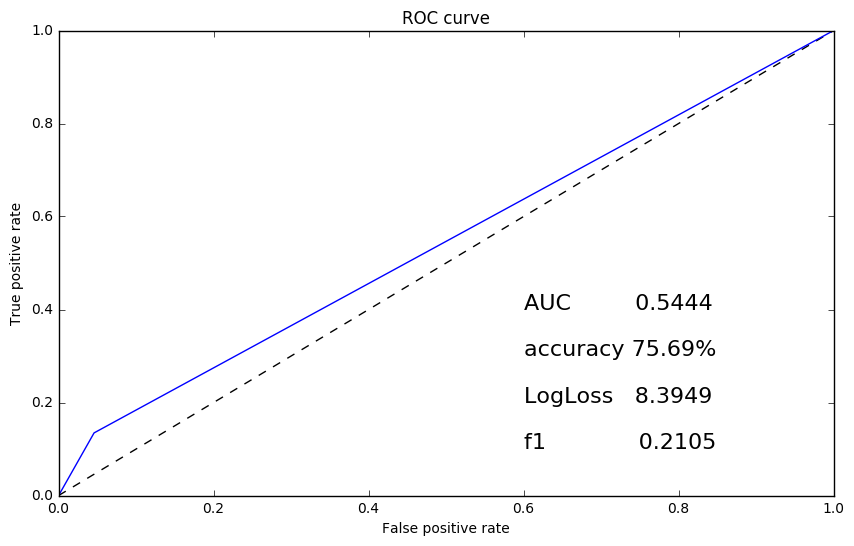

In [62]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score

fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=None)


plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

AUC = roc_auc_score(y_true, y_pred, average='macro')
plt.text(x=0.6,y=0.4,s="AUC         {:.4f}"\
         .format(AUC),
        fontsize=16)

plt.text(x=0.6,y=0.3,s="accuracy {:.2f}%"\
         .format(accuracy*100),
        fontsize=16)

logloss = log_loss(y_true, y_pred)
plt.text(x=0.6,y=0.2,s="LogLoss   {:.4f}"\
         .format(logloss),
        fontsize=16)

f1 = f1_score(y_true, y_pred)
plt.text(x=0.6,y=0.1,s="f1             {:.4f}"\
         .format(f1),
        fontsize=16)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


In [63]:
y_pred = knn.predict(testset)
print(y_pred[:10])

try:
    y_pred_probs  = knn.predict_proba(testset)
    print(y_pred_probs[:10])
    donate_probs  = [prob[1] for prob in y_pred_probs]
except Exception,e:
    print(e)
    donate_probs = [0.65 if x>0 else 1-0.65 for x in y_pred]
    
print(donate_probs[:10])

[0 0 0 0 0 0 0 0 0 0]
[[ 0.7  0.3]
 [ 0.5  0.5]
 [ 0.9  0.1]
 [ 1.   0. ]
 [ 0.9  0.1]
 [ 1.   0. ]
 [ 0.7  0.3]
 [ 0.9  0.1]
 [ 0.8  0.2]
 [ 1.   0. ]]
[0.29999999999999999, 0.5, 0.10000000000000001, 0.0, 0.10000000000000001, 0.0, 0.29999999999999999, 0.10000000000000001, 0.20000000000000001, 0.0]


In [ ]:
#all in one svm
svm.SVC(kernal='linear',C=1).fit(trainset.traintarget).score(trainset,traintarget)

In [90]:
#initialize the classifier
clf = svm.SVC(kernel='linear', C=1)

In [91]:
#fit
clf_fit=clf.fit(trainset, traintarget)

In [94]:
#fit score
clf_fit_score=clf_fit.score(trainset,traintarget)
clf_fit_score

0.7592592592592593

In [98]:
cv_score_svm = cross_val_score(clf_fit, trainset, traintarget, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_score_svm.mean(), cv_score_svm.std() * 2))

Accuracy: 0.76 (+/- 0.01)
